# Preprocess votes & persons data. Some descriptives

In [140]:
import pandas as pd
import numpy as np

df = pd.read_csv('votes-persons-data.csv')
df.count()

person-id        935352
initiative-id    935332
yob              935352
gender           935352
time             935352
dtype: int64

### Remove NaN inititative Ids

In [141]:

df = df[np.isfinite(df['initiative-id'])]
df.count()

person-id        935332
initiative-id    935332
yob              935332
gender           935332
time             935332
dtype: int64

### Remove votes for initiatives < 50 total votes

In [142]:
nodes = pd.read_csv('nodes.csv')
nodes = nodes.set_index(['id']) # for faster search

def is_large_enough(iid):
    return iid in nodes.index

df = df[df['initiative-id'].apply(is_large_enough) == True]

### Do some preprocessing for dates and year of birth

In [143]:
def convert_year(y):
    if y < 9:
        return 2000 + y
    else:
        return 1900 + y
    

df['time'] = pd.to_datetime(df['time'])    
df['yob'] = df['yob'].apply(convert_year)

### Write processed output file with votes and persons

In [144]:
df.to_csv('votes-persons-processed.csv',index=False)

## Persons

In [145]:
prs = df.groupby('person-id')['yob', 'gender'].first()

In [146]:
prs.to_csv('persons.csv', index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb009eb38>]],
      dtype=object)

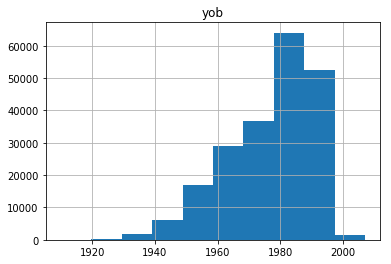

In [147]:
%matplotlib inline
prs.hist(column=['yob'])

In [148]:
prs['gender'].value_counts()

s    110922
v     97752
Name: gender, dtype: int64